In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import OneHotEncoder
from IPython.display import Markdown, display

In [39]:
# Define file path
user_transactions_file_directory = '/Users/tcbozay/Downloads/TaoYin_User_Transactions_v2.parquet'

# Read the parquet file
df_ut = pd.read_parquet(user_transactions_file_directory)
df_ut.head(5)

,customer,invoice,invoice_date,articlenr,volume,sum1,sum2,postcode_delivery,postcode_customer,channel
0,2284,1187467,2020-01-02,32879960,24,343.73,362.30,80413,80413,Tel 86041
1,2284,1187467,2020-01-02,32879962,60,1067.64,1119.96,80413,80413,Tel 86041
2,2284,1187467,2020-01-02,32841810,120,2214.00,2408.40,80413,80413,Tel 86041
3,1704,1191447,2020-01-17,36866802,1,21.52,19.32,81724,81724,OTC 81812
4,45,1187691,2020-01-03,34360272,4,28.91,28.49,81796,81796,Web Order


In [41]:
df_ut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492731 entries, 0 to 492730
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   customer           492731 non-null  int64         
 1   invoice            492731 non-null  int64         
 2   invoice_date       492731 non-null  datetime64[ns]
 3   articlenr          492731 non-null  int64         
 4   volume             492731 non-null  int64         
 5   sum1               492731 non-null  float64       
 6   sum2               492731 non-null  float64       
 7   postcode_delivery  492731 non-null  int64         
 8   postcode_customer  492731 non-null  int64         
 9   channel            492731 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(1)
memory usage: 37.6+ MB


In [43]:
# Apply one-hot encoding to categorical columns
encoded_df = pd.get_dummies(df_ut, columns=['channel'])
encoded_df.head(5)

,customer,invoice,invoice_date,articlenr,volume,sum1,sum2,postcode_delivery,postcode_customer,channel_ERP Order,...,channel_Others,channel_Tel 81812,channel_Tel 83047,channel_Tel 84817,channel_Tel 85705,channel_Tel 86041,channel_Tel 87324,channel_Tel 87547,channel_Tel 89206,channel_Web Order
0,2284,1187467,2020-01-02,32879960,24,343.73,362.30,80413,80413,False,...,False,False,False,False,False,True,False,False,False,False
1,2284,1187467,2020-01-02,32879962,60,1067.64,1119.96,80413,80413,False,...,False,False,False,False,False,True,False,False,False,False
2,2284,1187467,2020-01-02,32841810,120,2214.00,2408.40,80413,80413,False,...,False,False,False,False,False,True,False,False,False,False
3,1704,1191447,2020-01-17,36866802,1,21.52,19.32,81724,81724,False,...,False,False,False,False,False,False,False,False,False,False
4,45,1187691,2020-01-03,34360272,4,28.91,28.49,81796,81796,False,...,False,False,False,False,False,False,False,False,False,True


In [45]:
# Removing outliers
numeric_df = encoded_df[['volume', 'sum1', 'sum2']]
z_scores = np.abs(stats.zscore(numeric_df))
filtered_entries = (z_scores < 3.5).all(axis=1)
filtered_df = encoded_df[filtered_entries]
filtered_df.head(5)

,customer,invoice,invoice_date,articlenr,volume,sum1,sum2,postcode_delivery,postcode_customer,channel_ERP Order,...,channel_Others,channel_Tel 81812,channel_Tel 83047,channel_Tel 84817,channel_Tel 85705,channel_Tel 86041,channel_Tel 87324,channel_Tel 87547,channel_Tel 89206,channel_Web Order
0,2284,1187467,2020-01-02,32879960,24,343.73,362.30,80413,80413,False,...,False,False,False,False,False,True,False,False,False,False
1,2284,1187467,2020-01-02,32879962,60,1067.64,1119.96,80413,80413,False,...,False,False,False,False,False,True,False,False,False,False
2,2284,1187467,2020-01-02,32841810,120,2214.00,2408.40,80413,80413,False,...,False,False,False,False,False,True,False,False,False,False
3,1704,1191447,2020-01-17,36866802,1,21.52,19.32,81724,81724,False,...,False,False,False,False,False,False,False,False,False,False
4,45,1187691,2020-01-03,34360272,4,28.91,28.49,81796,81796,False,...,False,False,False,False,False,False,False,False,False,True


In [47]:
# Data Standartizing
postcode_data = filtered_df[['postcode_delivery', 'postcode_customer']].dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(postcode_data)

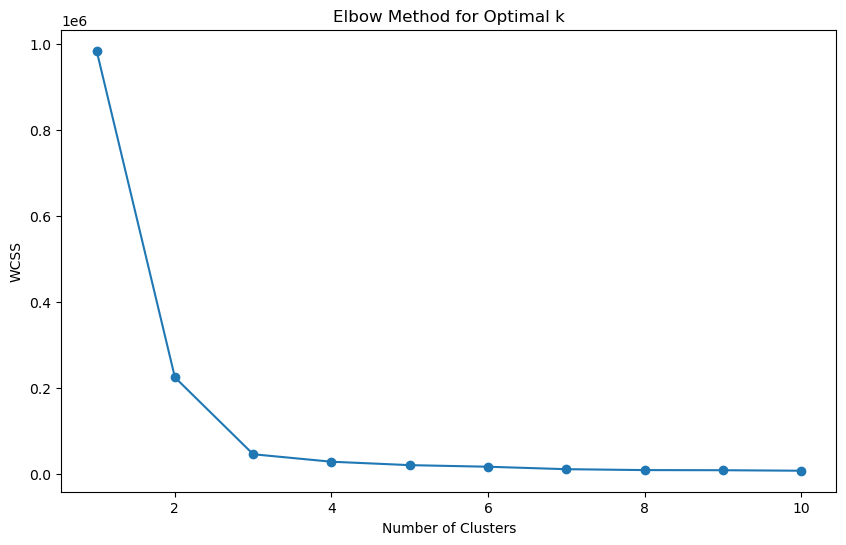

In [49]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plotting Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [51]:
# Apply K-means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# Add the cluster labels to the original DataFrame
filtered_df['Cluster'] = kmeans.labels_

# Display the first few rows of the DataFrame with cluster labels
filtered_df.head(60)

/var/folders/dz/6h0qw7sj6p7bwn7_zt0y8jz5qwt02z/T/ipykernel_67585/2589665924.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cluster'] = kmeans.labels_


,customer,invoice,invoice_date,articlenr,volume,sum1,sum2,postcode_delivery,postcode_customer,channel_ERP Order,...,channel_Tel 81812,channel_Tel 83047,channel_Tel 84817,channel_Tel 85705,channel_Tel 86041,channel_Tel 87324,channel_Tel 87547,channel_Tel 89206,channel_Web Order,Cluster
0,2284,1187467,2020-01-02,32879960,24,343.73,362.30,80413,80413,False,...,False,False,False,False,True,False,False,False,False,0
1,2284,1187467,2020-01-02,32879962,60,1067.64,1119.96,80413,80413,False,...,False,False,False,False,True,False,False,False,False,0
2,2284,1187467,2020-01-02,32841810,120,2214.00,2408.40,80413,80413,False,...,False,False,False,False,True,False,False,False,False,0
3,1704,1191447,2020-01-17,36866802,1,21.52,19.32,81724,81724,False,...,False,False,False,False,False,False,False,False,False,0
4,45,1187691,2020-01-03,34360272,4,28.91,28.49,81796,81796,False,...,False,False,False,False,False,False,False,False,True,0
5,812,1187640,2020-01-03,35620322,1,119.91,125.73,81681,81681,False,...,False,False,False,False,False,False,False,False,True,0
6,812,1187640,2020-01-03,35623298,1,346.06,350.60,81681,81681,False,...,False,False,False,False,False,False,False,False,True,0
7,812,1187640,2020-01-03,35621464,1,126.93,133.10,81681,81681,False,...,False,False,False,False,False,False,False,False,True,0
8,812,1187640,2020-01-03,35626924,4,4.51,4.61,81681,81681,False,...,False,False,False,False,False,False,False,False,True,0
9,812,1187640,2020-01-03,35620984,2,28.37,29.75,81681,81681,False,...,False,False,False,False,False,False,False,False,True,0


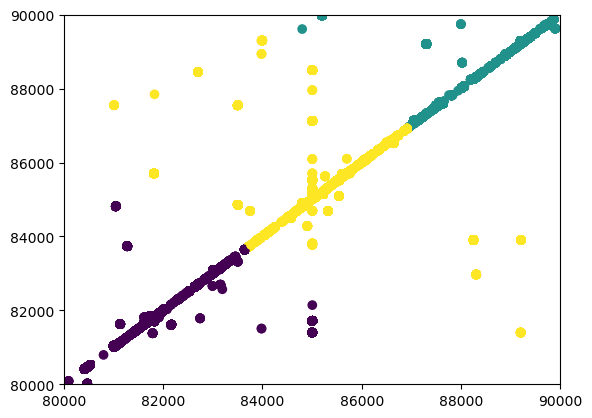

In [53]:
# Cluster Visualization
plt.scatter(x=filtered_df['postcode_delivery'], y=filtered_df['postcode_customer'], c=filtered_df['Cluster'])
plt.xlim(80000, 90000)
plt.ylim(80000,90000)
plt.show()

In [55]:
# Select only relevant numerical columns for calculating cluster means
# (e.g., excluding one-hot encoded columns and categoricals)
sales_columns = ['volume', 'sum1', 'sum2']

# Create a DataFrame with only the relevant columns and cluster labels
sales_data = filtered_df[sales_columns].copy()
sales_data['Cluster'] = kmeans.labels_

# Calculate the mean values for each cluster for selected columns
cluster_sales_means = sales_data.groupby('Cluster').mean()

# Display the mean values for each cluster to understand key differences
cluster_sales_means

,volume,sum1,sum2
Cluster,,,
0,90.115731,123.000288,125.215990
1,66.032809,118.867285,113.840545
2,58.759740,131.234863,144.151088


In [57]:
# Perform ANOVA for understanding the relationships between clusters.
anova_results = {}
sales_columns = ['volume', 'sum1', 'sum2']

for column in sales_columns:
    # Get values for each cluster
    cluster_0 = sales_data[sales_data['Cluster'] == 0][column]
    cluster_1 = sales_data[sales_data['Cluster'] == 1][column]
    cluster_2 = sales_data[sales_data['Cluster'] == 2][column]
    
    # Perform ANOVA
    f_stat, p_value = f_oneway(cluster_0, cluster_1, cluster_2)
    anova_results[column] = {'F-statistic': f_stat, 'p-value': p_value}

    # Comment on the ANOVA results
    if p_value < 0.05:
        print(f"For {column}, since the p-value is less than 0.05 (p-value = {p_value:.2e}), there is a statistically significant difference among the clusters.")
    else:
        print(f"For {column}, since the p-value is greater than or equal to 0.05 (p-value = {p_value:.2e}), there is no statistically significant difference among the clusters.")

For volume, since the p-value is less than 0.05 (p-value = 1.50e-301), there is a statistically significant difference among the clusters.
For sum1, since the p-value is less than 0.05 (p-value = 5.91e-14), there is a statistically significant difference among the clusters.
For sum2, since the p-value is less than 0.05 (p-value = 4.42e-70), there is a statistically significant difference among the clusters.


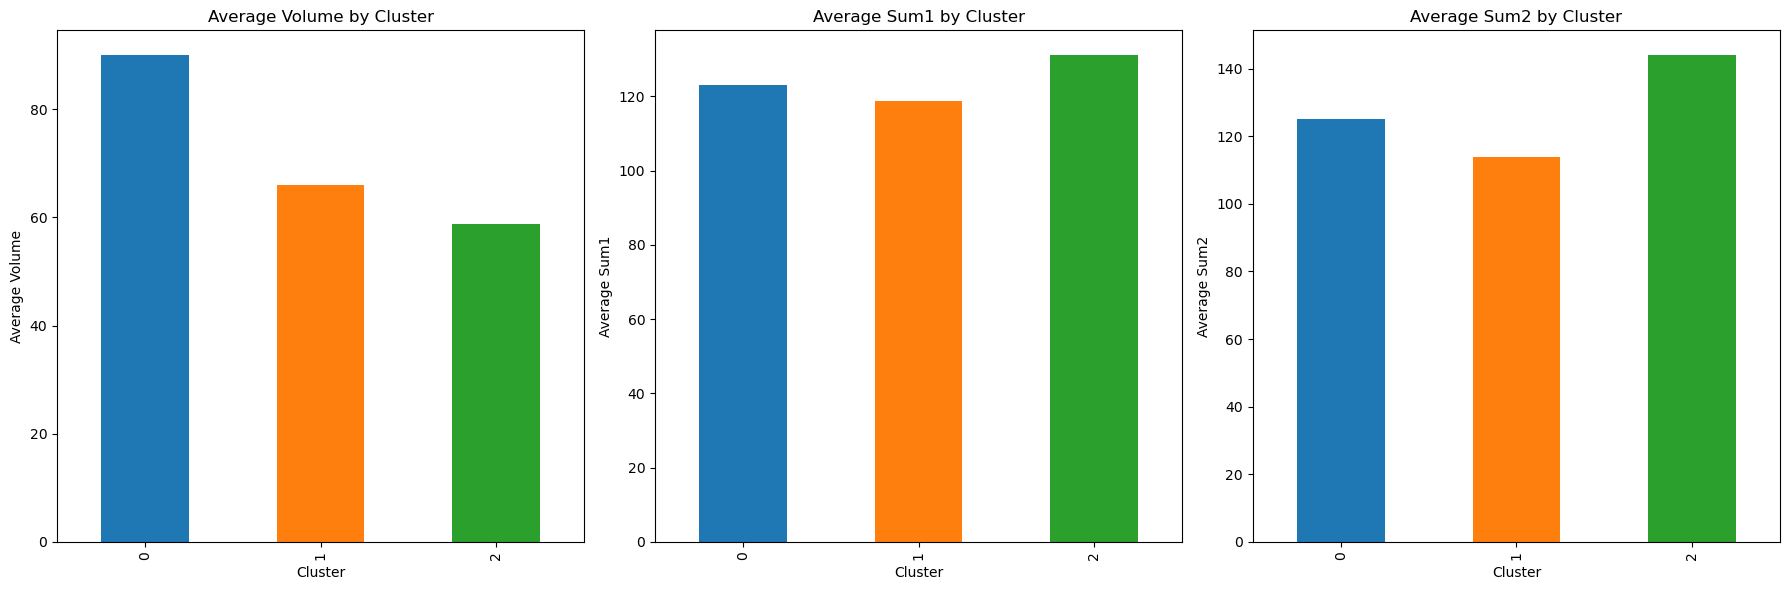

In [59]:
# Plot average values for each cluster
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# average values for volume
cluster_sales_means['volume'].plot(kind='bar', ax=axes[0], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[0].set_title('Average Volume by Cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Average Volume')

# average values for Sum 1
cluster_sales_means['sum1'].plot(kind='bar', ax=axes[1], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[1].set_title('Average Sum1 by Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Average Sum1')

#average values for Sum 2
cluster_sales_means['sum2'].plot(kind='bar', ax=axes[2], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[2].set_title('Average Sum2 by Cluster')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Average Sum2')

plt.tight_layout()
plt.show()

In [61]:
#                                               -Question 1-
# Do purchasing behaviors differ by customer location (postcode), and are certain products preferred in specific regions?

In [63]:
# Step 1: Identify the top 3 most common postcodes for each cluster
top_3_postcodes = filtered_df.groupby('Cluster')['postcode_delivery'].apply(lambda x: x.value_counts().nlargest(3).index.tolist()).reset_index()
top_3_postcodes.columns = ['Cluster', 'Top_Postcodes']

In [65]:
# Step 2: Filter data to include only rows with postcodes in the top 3 for each cluster
filtered_data = filtered_df[filtered_df.apply(lambda x: x['postcode_delivery'] in top_3_postcodes[top_3_postcodes['Cluster'] == x['Cluster']]['Top_Postcodes'].values[0], axis=1)]

In [66]:
# Step 3: Find the top-selling products by volume for each cluster and postcode
top_selling_products_by_region = filtered_data.groupby(['Cluster', 'postcode_delivery', 'articlenr']).agg({'volume': 'sum'}).reset_index()
top_selling_products_by_region = top_selling_products_by_region.sort_values(['Cluster', 'postcode_delivery', 'volume'], ascending=[True, True, False])
top_5_products_per_cluster_region = top_selling_products_by_region.groupby(['Cluster', 'postcode_delivery']).head(5)

In [33]:
# Step 4: Display results for top-selling products by region
display(top_5_products_per_cluster_region)

,Cluster,postcode_delivery,articlenr,volume
91,0,81681,26808098,744500
90,0,81681,26808092,699000
92,0,81681,26808102,655200
630,0,81681,32403818,598500
572,0,81681,32203620,561832
2764,0,81704,32203352,38200
2847,0,81704,32400008,37200
2475,0,81704,26808092,21200
2476,0,81704,26808098,20200
2888,0,81704,32408634,18000


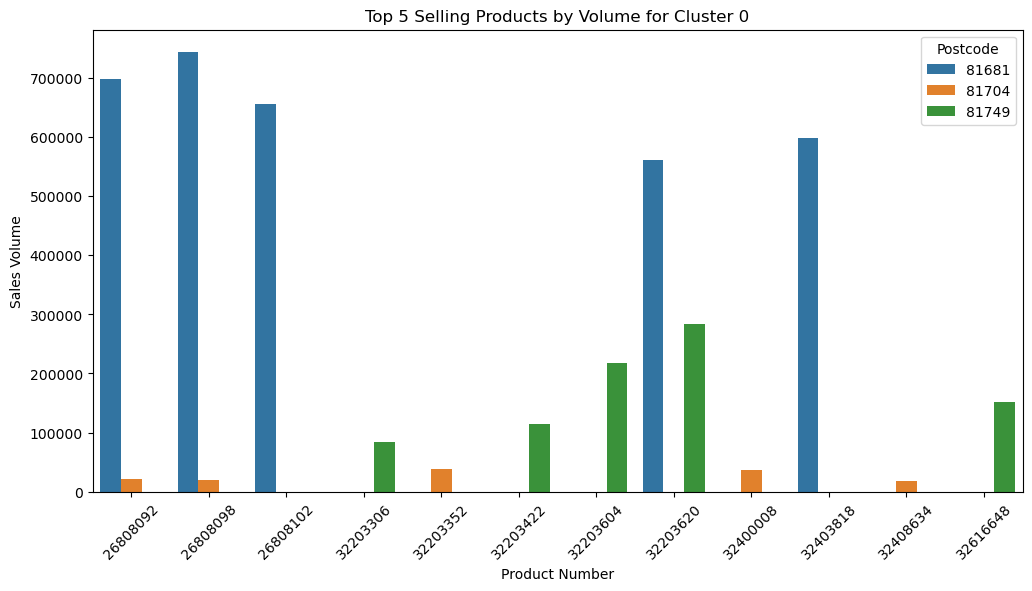

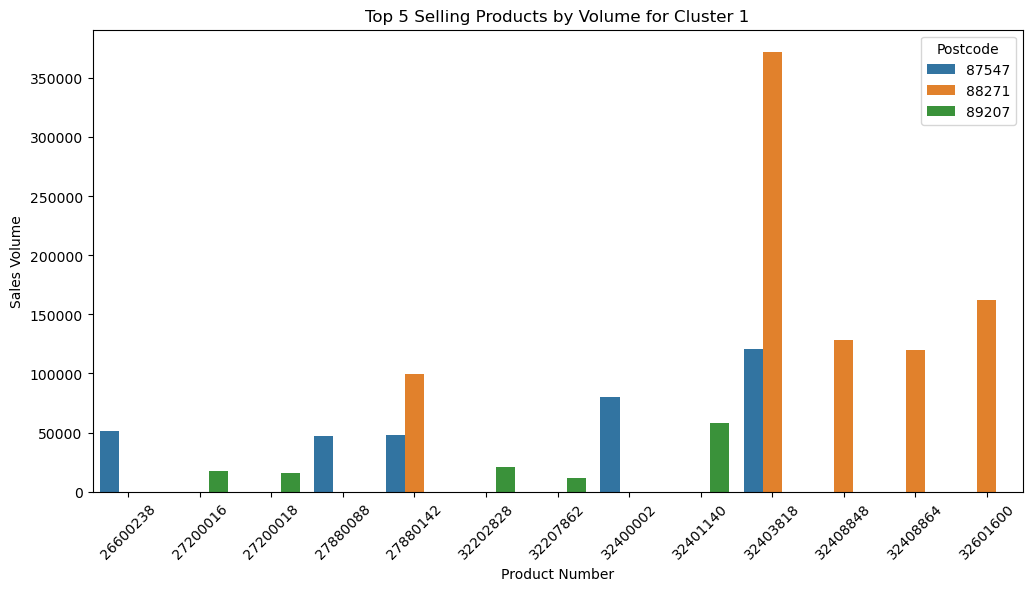

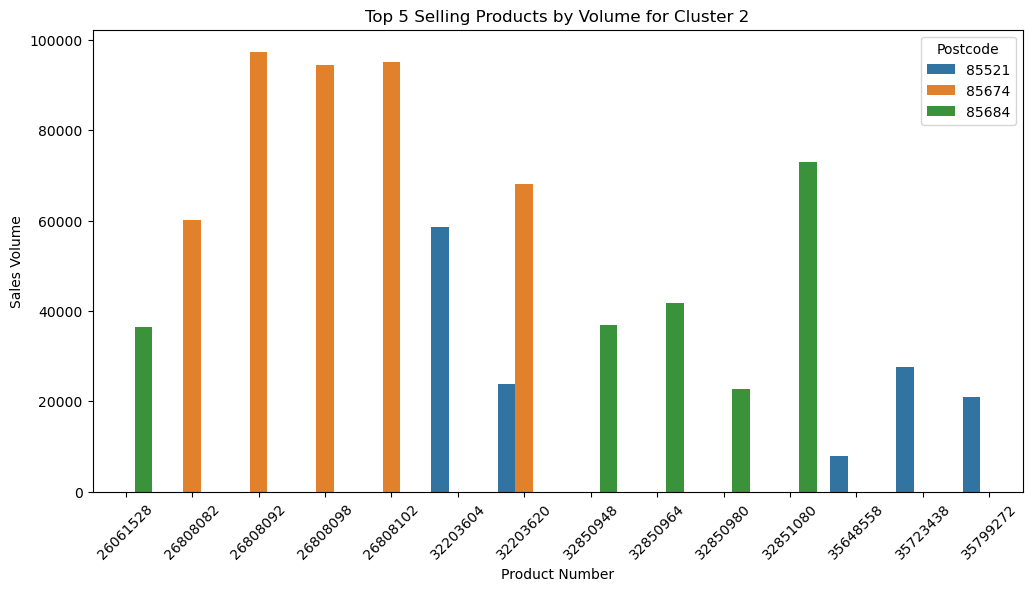

In [69]:
# Step 5: Visualization: Plot top-selling products for each cluster and region with distinct colors
for cluster in top_5_products_per_cluster_region['Cluster'].unique():
    cluster_data = top_5_products_per_cluster_region[top_5_products_per_cluster_region['Cluster'] == cluster]
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=cluster_data, x='articlenr', y='volume', hue='postcode_delivery', palette="tab10")
    plt.title(f'Top 5 Selling Products by Volume for Cluster {cluster}')
    plt.xlabel('Product Number')
    plt.ylabel('Sales Volume')
    plt.legend(title='Postcode', loc='upper right')
    plt.xticks(rotation=45)
    plt.show()

In [71]:
#                                               -Question 2-
# What are the distinct purchasing patterns for each sales channel, and how do they differ in total volume?

In [73]:
# Taking channel colums
channels = [col for col in channel_df.columns]
anova_results = {}

for channel in channels:
    group1 = encoded_df[df_encoded[channel] == 1]['volume']
    group2 = encoded_df[df_encoded[channel] == 0]['volume']
    # ANOVA test
    f_stat, p_value = stats.f_oneway(group1, group2)
    anova_results[channel] = {'F-statistic': f_stat, 'p-value': p_value}

# ANOVA Results
anova_df = pd.DataFrame(anova_results).T
print(anova_df)

                         F-statistic       p-value
channel_MobileApp Order     0.028899  8.650124e-01
channel_OTC 81812           2.287102  1.304540e-01
channel_OTC 83047          46.279825  1.026303e-11
channel_OTC 84817           0.002035  9.640155e-01
channel_OTC 85705           0.000573  9.809038e-01
channel_OTC 86041           6.154726  1.310647e-02
channel_OTC 87324           0.018824  8.908730e-01
channel_OTC 87547           5.920531  1.496580e-02
channel_OTC 89206           8.857147  2.919577e-03
channel_Others              0.015598  9.006088e-01
channel_Tel 81812           5.228976  2.221403e-02
channel_Tel 83047           0.537403  4.635113e-01
channel_Tel 84817           7.924638  4.876803e-03
channel_Tel 85705           0.647053  4.211687e-01
channel_Tel 86041           5.387358  2.028357e-02
channel_Tel 87324           0.066490  7.965175e-01
channel_Tel 87547           1.320578  2.504889e-01
channel_Tel 89206           1.398647  2.369508e-01
channel_Web Order          10.1

In [75]:
text = """
The ANOVA test results reveal that there are statistically significant differences in sales volumes across certain sales channels. Specifically, channels such as `channel_OTC 83047`, `channel_OTC 86041`, `channel_OTC 87547`, `channel_OTC 89206`, `channel_Tel 81812`, `channel_Tel 84817`, `channel_Tel 86041`, and `channel_Web Order` show a p-value below 0.05. This indicates that sales volumes in these channels are significantly different from others. Notably, `channel_OTC 83047` and `channel_Web Order` demonstrate a particularly strong impact on sales volume. These findings suggest that marketing strategies could benefit from focusing on these specific channels, as they appear to be more effective for certain products or customer segments. Further analysis can help clarify which regions or customer groups are more likely to purchase through these high-performing channels, aiding in more targeted marketing efforts.
"""

display(Markdown(text))


The ANOVA test results reveal that there are statistically significant differences in sales volumes across certain sales channels. Specifically, channels such as `channel_OTC 83047`, `channel_OTC 86041`, `channel_OTC 87547`, `channel_OTC 89206`, `channel_Tel 81812`, `channel_Tel 84817`, `channel_Tel 86041`, and `channel_Web Order` show a p-value below 0.05. This indicates that sales volumes in these channels are significantly different from others. Notably, `channel_OTC 83047` and `channel_Web Order` demonstrate a particularly strong impact on sales volume. These findings suggest that marketing strategies could benefit from focusing on these specific channels, as they appear to be more effective for certain products or customer segments. Further analysis can help clarify which regions or customer groups are more likely to purchase through these high-performing channels, aiding in more targeted marketing efforts.


In [41]:
# Scale the numeric columns
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(df_ut[['volume', 'sum1', 'sum2']])

In [43]:
# Combine scaled numeric and encoded categorical data
data_for_clustering = np.hstack((scaled_numeric, encoded_df))

In [45]:
# Set DBSCAN parameters
eps = 0.5  # start with a common default, adjust if necessary
min_samples = 5  # standard choice, adjust if necessary

In [ ]:
# Run DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(data_for_clustering)

In [ ]:
# Display the cluster distribution
print(df_ut['cluster'].value_counts())

In [ ]:
# Tried to do DBSCAN Clustering for categorical data 'channel'...

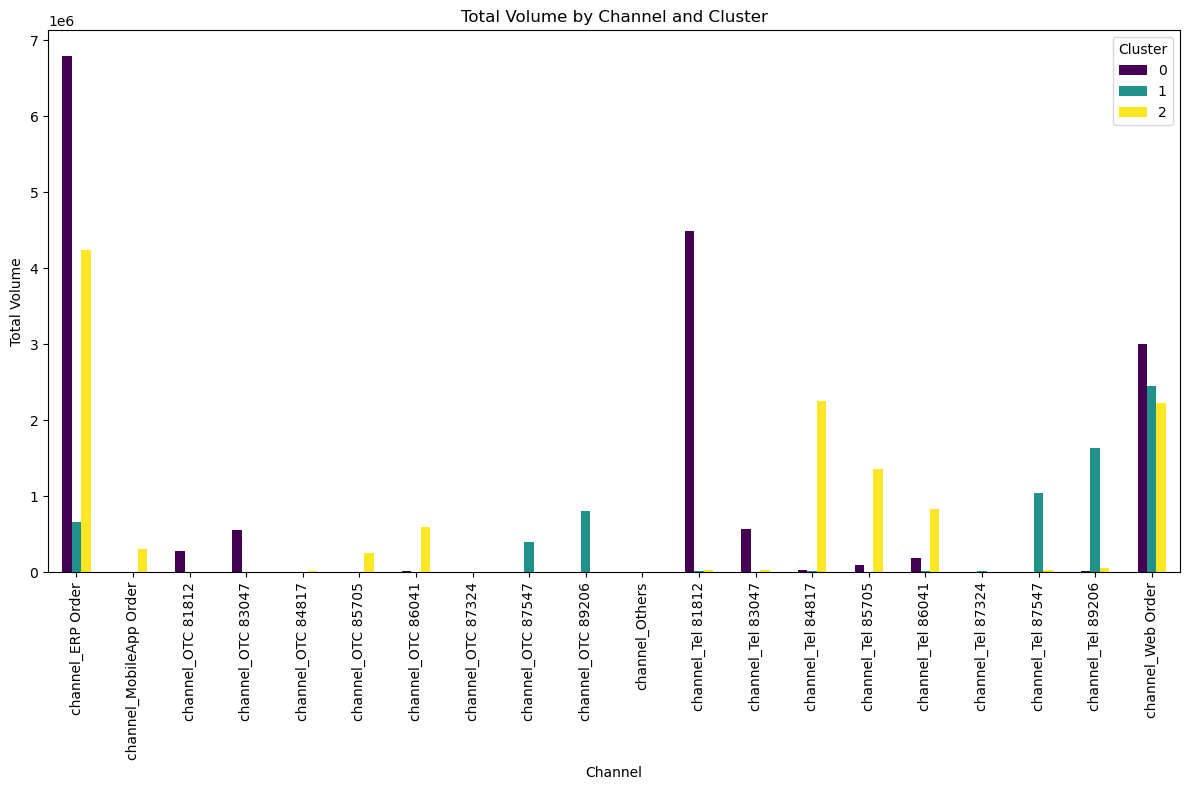

In [77]:
# Visualization of Total Volume for Channel and Clusters.
channel_columns = [col for col in filtered_df.columns if col.startswith('channel_')]

volume_per_channel_cluster = {}
for channel in channel_columns:
    volume_per_channel_cluster[channel] = filtered_df.groupby('Cluster')[channel].apply(lambda x: (x * filtered_df['volume']).sum())

volume_df = pd.DataFrame(volume_per_channel_cluster).T

fig, ax = plt.subplots(figsize=(12, 8))

volume_df.plot(kind='bar', ax=ax, colormap='viridis')
ax.set_title('Total Volume by Channel and Cluster')
ax.set_ylabel('Total Volume')
ax.set_xlabel('Channel')

plt.tight_layout()
plt.show()